In [65]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
from numpy import random

import keras
from keras import layers
from keras.layers import Input, Dense, Activation, Flatten, GlobalAveragePooling2D
from keras.models import Model

from keras.preprocessing import image
from keras.utils import layer_utils
from keras.layers import Dropout
from keras.regularizers import l2
from keras.regularizers import l1
np.random.seed(5)
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import cv2
import os
from keras.utils.np_utils import to_categorical

from PIL import Image

#% matplotlib inline
from keras.preprocessing.image import load_img,img_to_array,array_to_img,save_img

In [66]:
data = pd.read_csv('/content/drive/MyDrive/project/dataset2/labelTrain2.csv') # enter the file path on your drive for the csv file
data.head()

,Image,Class0,Class1
0,101.jpg,1,0
1,102.jpg,1,0
2,103.jpg,1,0
3,104.jpg,1,0
4,105.jpg,1,0


In [67]:
from keras.applications import inception_v3
from keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape=(500, 500, 3))
base_model.layers.pop()
base_model.layers.pop()
base_model.layers.pop()
base_model.layers.pop()

for layer in base_model.layers:
  layer.trainable = False
# base_model.summary()

In [70]:
data1 = pd.read_csv('/content/drive/MyDrive/project/dataset2/labelValid2.csv') # enter the file path on your drive for the csv file
data1.head()

,Image,Class0,Class1
0,165.jpg,1,0
1,166.jpg,1,0
2,167.jpg,1,0
3,168.jpg,1,0
4,169.jpg,1,0


In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
!unzip "/content/drive/MyDrive/project/dataset2/Train2.zip"

Archive:  /content/drive/MyDrive/project/dataset2/Train2.zip
replace Train2/101.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Train2/102.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Train2/102.jpg          
  inflating: Train2/103.jpg          
  inflating: Train2/104.jpg          
  inflating: Train2/105.jpg          
  inflating: Train2/106.jpg          
  inflating: Train2/107.jpg          
  inflating: Train2/108.jpg          
  inflating: Train2/109.jpg          
  inflating: Train2/110.jpg          
  inflating: Train2/111.jpg          
  inflating: Train2/112.jpg          
  inflating: Train2/113.jpg          
  inflating: Train2/114.jpg          
  inflating: Train2/115.jpg          
  inflating: Train2/116.jpg          
  inflating: Train2/117.jpg          
  inflating: Train2/118.jpg          
  inflating: Train2/119.jpg          
  inflating: Train2/120.jpg          
  inflating: Train2/121.jpg          
  inflating: Train2/122.jpg          
  inflating: 

In [73]:
y_col = ['Class0', 'Class1']

In [74]:
batch_size = 16
#FOLDER_PATH = Enter the path of the folder that contains images
data_path = "/content/Train2" #where you extracted the zip file

#Should augmentations be the same for training and validation? 
#train_aug = ImageDataGenerator(rescale=1./255, ...)
#valid_aug = ImageDataGenerator(rescale=1./255, ...)

#shuffle the data
data = data.sample(frac=1)
data.reset_index(drop = True, inplace = True)

train_aug = ImageDataGenerator(rescale=1./255, 
                              #  width_shift_range=[-100,100], 
                              #  height_shift_range=0.5,       
                               shear_range=0.2,
                               horizontal_flip=True,
                               vertical_flip=True,
                               rotation_range=90,
                               brightness_range=[0.2,0.05],
                               zoom_range=0.2
                               )

# train_aug = ImageDataGenerator(rescale=1./255,         
#                                shear_range=0.2,
#                                zoom_range=0.2,
#                                horizontal_flip=False)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_aug = ImageDataGenerator(rescale=1./255)

train_generator = train_aug.flow_from_dataframe(
    dataframe=data,
    directory=data_path,
    x_col='Image',
    y_col= y_col,
    class_mode="raw",
    target_size=(500,500), #this will resize the image, you can change the size
    batch_size=batch_size)




Found 192 validated image filenames.


In [75]:
# cd C:/Users/Asus/Downloads/cropped images/Valid

In [76]:
!unzip "/content/drive/MyDrive/project/dataset2/Valid2.zip"

Archive:  /content/drive/MyDrive/project/dataset2/Valid2.zip
replace Valid2/165.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Valid2/165.jpg          
  inflating: Valid2/166.jpg          
  inflating: Valid2/167.jpg          
  inflating: Valid2/168.jpg          
  inflating: Valid2/169.jpg          
  inflating: Valid2/170.jpg          
  inflating: Valid2/171.jpg          
  inflating: Valid2/172.jpg          
  inflating: Valid2/173.jpg          
  inflating: Valid2/174.jpg          
  inflating: Valid2/175.jpg          
  inflating: Valid2/176.jpg          
  inflating: Valid2/177.jpg          
  inflating: Valid2/178.jpg          
  inflating: Valid2/179.jpg          
  inflating: Valid2/180.jpg          
  inflating: Valid2/265.jpg          
  inflating: Valid2/266.jpg          
  inflating: Valid2/267.jpg          
  inflating: Valid2/268.jpg          
  inflating: Valid2/269.jpg          
  inflating: Valid2/270.jpg          
  inflating: Valid2/271.jpg          
 

In [77]:
valid_generator = test_aug.flow_from_dataframe(
    dataframe=data1,
    directory="/content/Valid2",
    x_col='Image',
    y_col= y_col,
    class_mode= "raw",
    target_size=(500,500), #this will resize the image, you can change the size
    batch_size=batch_size
)

Found 48 validated image filenames.


In [78]:
!unzip "/content/drive/MyDrive/project/dataset2/Test2.zip"
data2 = pd.read_csv('/content/drive/MyDrive/project/dataset2/labelTest2.csv') # enter the file path on your drive for the csv file
data2.head()

Archive:  /content/drive/MyDrive/project/dataset2/Test2.zip
replace Test2/181.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Test2/181.jpg           
  inflating: Test2/182.jpg           
  inflating: Test2/183.jpg           
  inflating: Test2/184.jpg           
  inflating: Test2/185.jpg           
  inflating: Test2/186.jpg           
  inflating: Test2/187.jpg           
  inflating: Test2/188.jpg           
  inflating: Test2/189.jpg           
  inflating: Test2/190.jpg           
  inflating: Test2/191.jpg           
  inflating: Test2/192.jpg           
  inflating: Test2/193.jpg           
  inflating: Test2/194.jpg           
  inflating: Test2/195.jpg           
  inflating: Test2/196.jpg           
  inflating: Test2/197.jpg           
  inflating: Test2/198.jpg           
  inflating: Test2/199.jpg           
  inflating: Test2/200.jpg           
  inflating: Test2/281.jpg           
  inflating: Test2/282.jpg           
  inflating: Test2/283.jpg           
  i

,Image,Class0,Class1
0,181.jpg,1,0
1,182.jpg,1,0
2,183.jpg,1,0
3,184.jpg,1,0
4,185.jpg,1,0


In [79]:
test_generator = test_aug.flow_from_dataframe(
    dataframe=data2,
    directory="/content/Test2",
    x_col='Image',
    y_col= y_col,
    class_mode= "raw",
    target_size=(500,500), #this will resize the image, you can change the size
    batch_size=batch_size
)

data3 = pd.read_csv('/content/drive/MyDrive/project/dataset2/labelTest2final.csv') # enter the file path on your drive for the csv file
data3.head()


Found 60 validated image filenames.


,Image,label
0,181.jpg,0
1,182.jpg,0
2,183.jpg,0
3,184.jpg,0
4,185.jpg,0


In [94]:
def brain_model(base_model, img_shape = (500,500,3)):
    
    
    # create the input layer (Same as the imageNetv2 input size)
    inputs = tf.keras.Input(shape=img_shape) 
    
    # Forward pass to get the output of the last pooling layer
    X = base_model(inputs)
    #X = Dropout(.5, img_shape)(X)
    X = GlobalAveragePooling2D()(X)
    X = Dropout(.25)(X)
    # Define the new binary classification head 
    
    # X = Dense(1024, activation='relu', name='fc1')(X)
    # X = Dropout(.5)(X)
    # X = Dense(512, activation='relu', name='fc2')(X)
    # X = Dropout(.25)(X)
    X = Dense(512, activation='relu', name='fc3')(X)
    X = Dropout(.5)(X)
    # X = Dense(128, activation='relu', name='fc4')(X)
    # X = Dropout(.25)(X)
    X = Dense(128, activation='relu', name='fc5')(X)
    X = Dropout(.5)(X)
        
    outputs = Dense(2,activation='softmax', name='predictions')(X)
    model = tf.keras.Model(inputs, outputs)
    
    return model


#Create your model using the function above
model = brain_model (base_model, img_shape = (500,500,3))
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 500, 500, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 14, 14, 2048)      21802784  
                                                                 
 global_average_pooling2d_12  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_47 (Dropout)        (None, 2048)              0         
                                                                 
 fc3 (Dense)                 (None, 512)               1049088   
                                                                 
 dropout_48 (Dropout)        (None, 512)               0         
                                                          

In [95]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, batch_size= 16 ,epochs=25, validation_data = valid_generator,callbacks= callback )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25
12/12 [==============================] - 19s 1s/step - loss: 0.6073 - accuracy: 0.7135 - val_loss: 0.4622 - val_accuracy: 0.6875
Epoch 2/25
12/12 [==============================] - 14s 1s/step - loss: 0.3217 - accuracy: 0.8698 - val_loss: 0.8050 - val_accuracy: 0.6667
Epoch 3/25
12/12 [==============================] - 14s 1s/step - loss: 0.2820 - accuracy: 0.9271 - val_loss: 1.1492 - val_accuracy: 0.6667
Epoch 4/25
12/12 [==============================] - 16s 1s/step - loss: 0.1471 - accuracy: 0.9479 - val_loss: 1.7817 - val_accuracy: 0.6667
Epoch 5/25
12/12 [==============================] - 14s 1s/step - loss: 0.1311 - accuracy: 0.9583 - val_loss: 0.9817 - val_accuracy: 0.6667
Epoch 6/25
12/12 [==============================] - 14s 1s/step - loss: 0.0865 - accuracy: 0.9844 - val_loss: 0.9292 - val_accuracy: 0.6667
Epoch 7/25
12/12 [==============================] - 14s 1s/step - loss: 0.1390 - accuracy: 0.9688 - val_loss: 1.1364 - val_accuracy: 0.6667
Epoch 8/25
12/12 [==

In [96]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

y_predict = model.predict(test_generator)

y_predict = y_predict.argmax(-1)
accuracy_score(data3['label'],y_predict)
    


0.6333333333333333

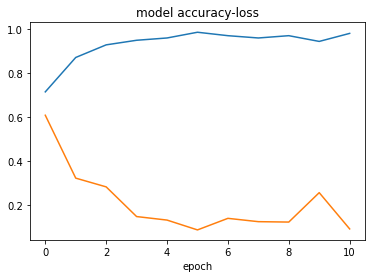

In [97]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy-loss')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
#plt.legend(['8', '16', '32', '128'], loc='upper left')
plt.plot(history.history['loss'])
# plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['8', '16', '32', '128'], loc='upper left')
plt.show()